In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import os

# 配置参数
store_pkl_dir = 'Results'
base_name_central = 'cent_cnn_res'
base_name_fed = 'fed_cnn_res'
base_name_split = 'split_cnn_5cli_res_997train'
n_files = 10
n_epochs = 200
confidence_level = 0.95

def load_group_results(base_name):
    data_array = np.zeros((n_files, n_epochs))
    for i in range(n_files):
        filename = f"{base_name}_{i}.pkl" if i > 0 else f"{base_name}.pkl"
        with open(os.path.join('..', store_pkl_dir, filename), 'rb') as f:
            data = pickle.load(f)
            data_array[i] = data["test_accuracy"]
    return data_array

def calculate_stats(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=1)
    n = data.shape[0]
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    ci = t_value * std / np.sqrt(n)
    return mean, ci

# 加载数据
data_cent = load_group_results(base_name_central)
data_fed = load_group_results(base_name_fed)
data_split = load_group_results(base_name_split)

# 配色
color_cent = '#1f77b4'   # 蓝色 (Cent)
color_fed = "#e4ba15"    # 黄色 (Fed)
color_split = '#2ca02c'  # 绿色 (Split)
alpha_fill = 0.2

# 绘图
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 6))

epochs = np.arange(1, n_epochs + 1)

# Centralized Learning (蓝色)
mean_c, ci_c = calculate_stats(data_cent)
plt.plot(epochs, mean_c, color=color_cent, linewidth=2, label='Centralized Learning')
plt.fill_between(epochs, mean_c - ci_c, mean_c + ci_c, color=color_cent, alpha=alpha_fill)

# Federated Learning (黄色)
mean_f, ci_f = calculate_stats(data_fed)
plt.plot(epochs, mean_f, color=color_fed, linewidth=2, label='Federated Learning')
plt.fill_between(epochs, mean_f - ci_f, mean_f + ci_f, color=color_fed, alpha=alpha_fill)

# Split Learning (绿色)
mean_s, ci_s = calculate_stats(data_split)
plt.plot(epochs, mean_s, color=color_split, linewidth=2, label='Split Learning')
plt.fill_between(epochs, mean_s - ci_s, mean_s + ci_s, color=color_split, alpha=alpha_fill)

plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.ylim(0.5, 1.0)
plt.style.use('default')
plt.tight_layout()
plt.savefig('only_test_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import os

# 配置参数
store_pkl_dir = 'Results'
base_name_cent = 'test_cent_5cli_ast'
base_name_split = 'test_split_5cli_ast'
base_name_fed = 'test_fed_5cli_ast'  # 假设联邦学习的文件名格式
n_files = 5  # 从1到5个文件
n_epochs = 50  # 假设有50个epochs
confidence_level = 0.95

# 加载多个文件的结果
def load_group_results(base_name, n_files, nm):
    data_array = np.zeros((n_files, n_epochs))
    for i in range(n_files):
        filename = f"{base_name}_{i+1}.pkl"  # 从1到5
        pkl_path = os.path.join('..', store_pkl_dir, filename)
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            data_array[i] = data[f"{nm}"]  # 读取test_accuracies
    return data_array

# 计算均值和置信区间
def calculate_stats(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=1)
    n = data.shape[0]
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    ci = t_value * std / np.sqrt(n)
    return mean, ci

# 加载数据
data_cent = load_group_results(base_name_cent, n_files, 'test_accuracies')
data_split = load_group_results(base_name_split, n_files, 'test_accuracy')
data_fed = load_group_results(base_name_fed, n_files, 'test_accuracies')  # 联邦学习

# 配色
color_cent = '#9467bd'   # 绿色
color_split = '#ff7f0e'  # ff7f0e
color_fed = '#d62728'    # 橙色
alpha_fill = 0.2

# 绘图
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 6))

epochs = np.arange(1, n_epochs + 1)

# Centralized Learning (乘以1.1)
mean_c, ci_c = calculate_stats(data_cent)

plt.plot(epochs, mean_c, color=color_cent, linewidth=2, label='Centralized Learning')
plt.fill_between(epochs, mean_c - ci_c, mean_c + ci_c, color=color_cent, alpha=alpha_fill)

# Split Learning
mean_s, ci_s = calculate_stats(data_split)
plt.plot(epochs, mean_s, color=color_split, linewidth=2, label='Split Learning')
plt.fill_between(epochs, mean_s - ci_s, mean_s + ci_s, color=color_split, alpha=alpha_fill)

# Federated Learning
mean_f, ci_f = calculate_stats(data_fed)
plt.plot(epochs, mean_f, color=color_fed, linewidth=2, label='Federated Learning')
plt.fill_between(epochs, mean_f - ci_f, mean_f + ci_f, color=color_fed, alpha=alpha_fill)

plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.ylim(0.5, 1.0)
plt.style.use('default')
plt.tight_layout()

# 保存图像
plt.savefig('test_accuracy_comparison.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()


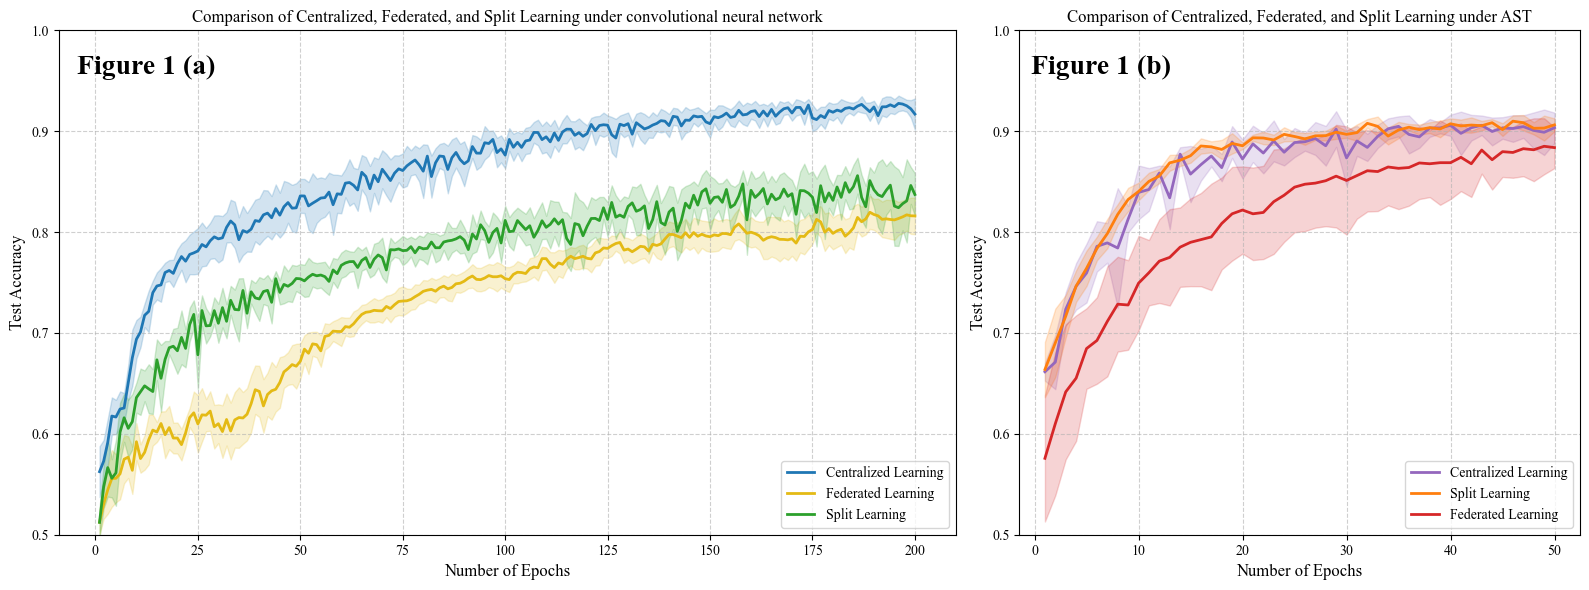

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import os
import matplotlib.gridspec as gridspec

# 配置参数
store_pkl_dir = 'Results'
base_name_central = 'cent_cnn_res'
base_name_fed = 'fed_cnn_res'
base_name_split = 'split_cnn_5cli_res_997train'
n_files = 10
n_epochs = 200
confidence_level = 0.9

def load_group_results(base_name):
    data_array = np.zeros((n_files, n_epochs))
    for i in range(n_files):
        filename = f"{base_name}_{i}.pkl" if i > 0 else f"{base_name}.pkl"
        with open(os.path.join('..', store_pkl_dir, filename), 'rb') as f:
            data = pickle.load(f)
            data_array[i] = data["test_accuracy"]
    return data_array

def calculate_stats(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=1)
    n = data.shape[0]
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    ci = t_value * std / np.sqrt(n)
    return mean, ci

# 加载数据
data_cent = load_group_results(base_name_central)
data_fed = load_group_results(base_name_fed)
data_split = load_group_results(base_name_split)

# 配色
color_cent = '#1f77b4'   # 蓝色 (Cent)
color_fed = "#e4ba15"    # 黄色 (Fed)
color_split = '#2ca02c'  # 绿色 (Split)
alpha_fill = 0.2

# 创建子图
fig = plt.figure(figsize=(16, 6))  # 16宽，6高
plt.rcParams['font.family'] = 'Times New Roman'

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.25])  # 左图占2份，右图占1份

# 第一张图：左边 (大图)
ax1 = plt.subplot(gs[0])

epochs = np.arange(1, n_epochs + 1)

# Centralized Learning (蓝色)
mean_c, ci_c = calculate_stats(data_cent)
ax1.plot(epochs, mean_c, color=color_cent, linewidth=2, label='Centralized Learning')
ax1.fill_between(epochs, mean_c - ci_c, mean_c + ci_c, color=color_cent, alpha=alpha_fill)

# Federated Learning (黄色)
mean_f, ci_f = calculate_stats(data_fed)
ax1.plot(epochs, mean_f, color=color_fed, linewidth=2, label='Federated Learning')
ax1.fill_between(epochs, mean_f - ci_f, mean_f + ci_f, color=color_fed, alpha=alpha_fill)

# Split Learning (绿色)
mean_s, ci_s = calculate_stats(data_split)
ax1.plot(epochs, mean_s, color=color_split, linewidth=2, label='Split Learning')
ax1.fill_between(epochs, mean_s - ci_s, mean_s + ci_s, color=color_split, alpha=alpha_fill)

ax1.set_xlabel('Number of Epochs', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='lower right')
ax1.set_ylim(0.5, 1.0)
ax1.set_title('Comparison of Centralized, Federated, and Split Learning under convolutional neural network')

# 第二张图：右边 (小图)
ax2 = plt.subplot(gs[1])

base_name_cent2 = 'test_cent_5cli_ast'
base_name_split2 = 'test_split_5cli_ast'
base_name_fed2 = 'test_fed_5cli_ast'  # 假设联邦学习的文件名格式
n_files2 = 5  # 从1到5个文件
n_epochs2 = 50  # 假设有50个epochs

def load_group_results2(base_name, n_files, nm):
    data_array = np.zeros((n_files, n_epochs2))
    for i in range(n_files):
        filename = f"{base_name}_{i+1}.pkl"  # 从1到5
        pkl_path = os.path.join('..', store_pkl_dir, filename)
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            data_array[i] = data[f"{nm}"]  # 读取test_accuracies
    return data_array

# 加载数据
data_cent2 = load_group_results2(base_name_cent2, n_files2, 'test_accuracies')
data_split2 = load_group_results2(base_name_split2, n_files2, 'test_accuracy')
data_fed2 = load_group_results2(base_name_fed2, n_files2, 'test_accuracies')  # 联邦学习

color_cent2 = '#9467bd'   # 紫色 (Cent)
color_split2 = '#ff7f0e'  # 橙色 (Split)
color_fed2 = '#d62728'    # 红色 (Fed)

epochs2 = np.arange(1, n_epochs2 + 1)  # 修正为n_epochs2

# Centralized Learning (紫色)
mean_c2, ci_c2 = calculate_stats(data_cent2)
ax2.plot(epochs2, mean_c2, color=color_cent2, linewidth=2, label='Centralized Learning')
ax2.fill_between(epochs2, mean_c2 - ci_c2, mean_c2 + ci_c2, color=color_cent2, alpha=alpha_fill)

# Split Learning (橙色)
mean_s2, ci_s2 = calculate_stats(data_split2)
ax2.plot(epochs2, mean_s2, color=color_split2, linewidth=2, label='Split Learning')
ax2.fill_between(epochs2, mean_s2 - ci_s2, mean_s2 + ci_s2, color=color_split2, alpha=alpha_fill)

# Federated Learning (红色)
mean_f2, ci_f2 = calculate_stats(data_fed2)
ax2.plot(epochs2, mean_f2, color=color_fed2, linewidth=2, label='Federated Learning')
ax2.fill_between(epochs2, mean_f2 - ci_f2, mean_f2 + ci_f2, color=color_fed2, alpha=alpha_fill)

ax2.set_xlabel('Number of Epochs', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='lower right')
ax2.set_ylim(0.5, 1.0)
ax2.set_title('Comparison of Centralized, Federated, and Split Learning under AST')
ax1.text(0.02, 0.95, 'Figure 1 (a)', transform=ax1.transAxes, fontsize=20, verticalalignment='top', fontweight='bold')
ax2.text(0.02, 0.95, 'Figure 1 (b)', transform=ax2.transAxes, fontsize=20, verticalalignment='top', fontweight='bold')


# 调整布局并保存图像
plt.tight_layout()
plt.savefig('comparison_plot.png', dpi=300, bbox_inches='tight')
plt.show()
